Add your information below and submit the file via canvas (till the end of the day) to claim points for participation.

Names: Joao Victor Coutinho Viragine and Nikolay Lalev

Group number: 28

Collaborators: Joao Victor Coutinho Viragine and Nikolay Lalev


# Part 1: Describing Data

### What do you find in this part?

In this bootcamp, first, you will familiarize yourself with the Python libraries 'statsmodels' and 'SciPy' that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables and perform hypothesis testing. Then, second, you will work (in groups) on a set of exercises that will let you practice your skills.

Here we show a couple of examples of how to do common analyses, but there are many more useful probability distributions and statistical tests. In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook:
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html), [more complete documentation](https://www.statsmodels.org/stable/stats.html)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

## B1.1 Tutorial: How to use the libraries

- You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Here we load it. Take some time to familiarize yourself with the contents. One row represents one county.

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [4]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [5]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [6]:
df.sample(10)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1902,37025,North Carolina,Cabarrus,188375,91929,96446,9.8,69.6,16.1,0.2,...,0.7,0.9,4.2,27.0,87960,81.5,13.7,4.7,0.1,9.2
529,13289,Georgia,Twiggs,8509,4180,4329,0.1,55.8,42.0,0.1,...,0.9,1.0,1.4,32.2,2581,81.1,17.5,1.4,0.0,6.7
665,17141,Illinois,Ogle,52397,26103,26294,9.4,88.0,1.0,0.0,...,1.7,0.9,4.2,24.7,24989,79.8,14.5,5.6,0.1,8.0
2275,42063,Pennsylvania,Indiana,87895,44252,43643,1.3,93.9,2.3,0.2,...,5.3,1.9,3.2,22.2,38903,78.4,14.7,6.7,0.2,7.8
2714,48383,Texas,Reagan,3598,1853,1745,67.0,30.9,1.7,0.0,...,2.6,1.2,1.3,16.6,1778,70.0,18.7,11.1,0.2,2.2
700,18007,Indiana,Benton,8752,4367,4385,5.2,92.9,0.8,0.0,...,3.8,0.8,5.9,26.1,4096,73.6,17.1,8.5,0.7,5.3
900,20025,Kansas,Clark,2145,1055,1090,12.1,81.3,1.0,1.7,...,8.4,1.5,4.2,16.1,1040,60.7,23.7,15.6,0.1,1.4
2489,47123,Tennessee,Monroe,45293,22675,22618,3.9,91.5,2.1,0.8,...,0.4,1.3,2.7,28.0,16178,81.8,11.2,6.9,0.1,12.5
199,6027,California,Inyo,18373,9214,9159,20.6,64.8,1.0,10.2,...,9.2,5.5,5.4,14.6,8370,62.4,28.1,9.5,0.0,6.8
256,8023,Colorado,Costilla,3581,1866,1715,64.4,32.1,0.0,0.0,...,5.1,0.0,5.9,20.0,1240,63.8,21.7,14.0,0.5,14.0


- We will focus first on income per capita across counties.

<Axes: >

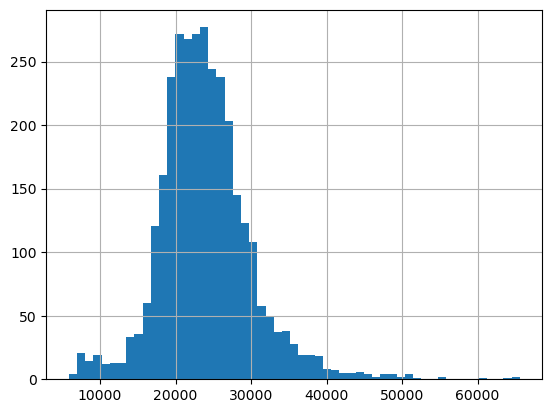

In [7]:
df['IncomePerCap'].hist(bins=55)

### 1. Calculating descriptive statisctics

- Let's calculate basic descriptive statistics of the income per capita.

In [8]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

- What distribution does the data come from? Here is how we can test the goodness of the fit.

In [9]:
# does the data come from a normal distrbution?
# if needed check the documentation of diagnostic
# https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.kstest_normal.html
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(0.0637621121184162, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [10]:
#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.433243770582646, 0.0009999999999998899)

- p < 0.05 -> not exponential either!

### 2. How to sample the data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [11]:
#make 10 samples with replacement
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be acieved with weights parameter
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

In [12]:
#on avergage, the samples in the sample produce with reveighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

80630.8
1316472.9


### 3. Examining relationship between two variables

- Is income per capita of a county correlated with the unemployment?

In [13]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

PearsonRResult(statistic=0.26461363203944843, pvalue=9.942215354243078e-53)

- There is a small (0.26), but significant (p < 0.05) positive correlation. So this means that we can trust the test. Our Null Hypothesis is that these 2 Variables are NOT Correlated. Because our p-value is so small (way less than 0.05), this means that we can reject the Null Hypothesis, meaning that they are correlated.

In [14]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

- Spearman rank coorrelation is also significant.

Check the differences between the two correlations [here](https://www.theiotacademy.co/blog/pearson-vs-spearman-correlation/)

### 4. Hypothesis testing

- Is income per capita higher in New York counties compared to California counties?

In [15]:
df.loc[df['State'] == 'New York']['IncomePerCap'].mean()

28189.75806451613

In [16]:
df.loc[df['State'] == 'California']['IncomePerCap'].mean()

27902.603448275862

- We see that there is a ~300$ gap. Quite a lot!
- But is it significantly higher? Let's use a t-test. This is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values.

In [17]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

Ttest_indResult(statistic=0.19788117232375713, pvalue=0.8434785239169611)

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference
- We are saying that there is no signficant difference between the income of New York and California

In [18]:
df.loc[df['State'] == 'West Virginia']['IncomePerCap'].mean()

21710.418181818182

In [19]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'West Virginia']['IncomePerCap'])

Ttest_indResult(statistic=6.1980618656588735, pvalue=9.19192230479492e-09)

### 5. How to measure uncertainty
- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

(25000.0, 32000.0)

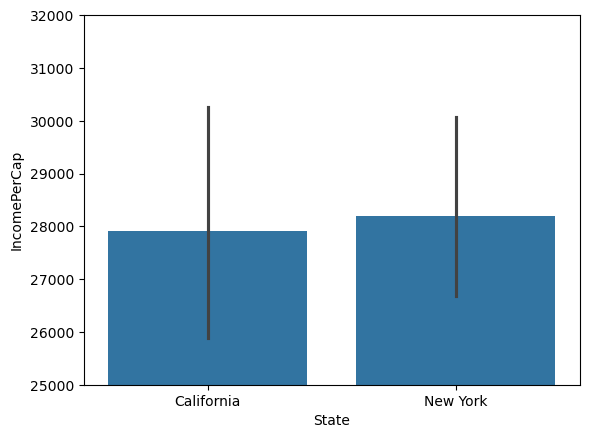

In [20]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000])

(18000.0, 32000.0)

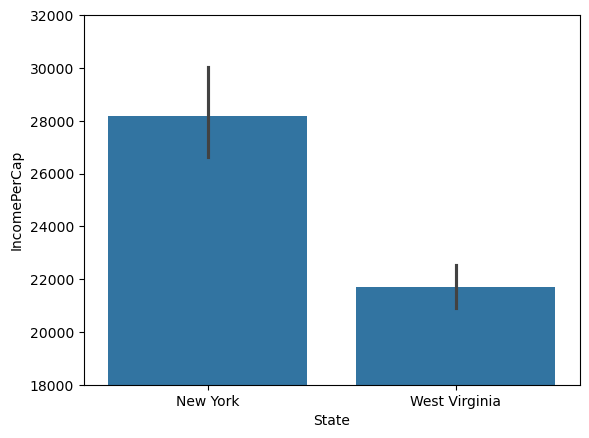

In [21]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','West Virginia'])])
plt.ylim([18000,32000])

## B1.2: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since in 2025 it is still unethical (and perhaps impossible?) in this setting to run a controlled experiment involving citizens (e.g. fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

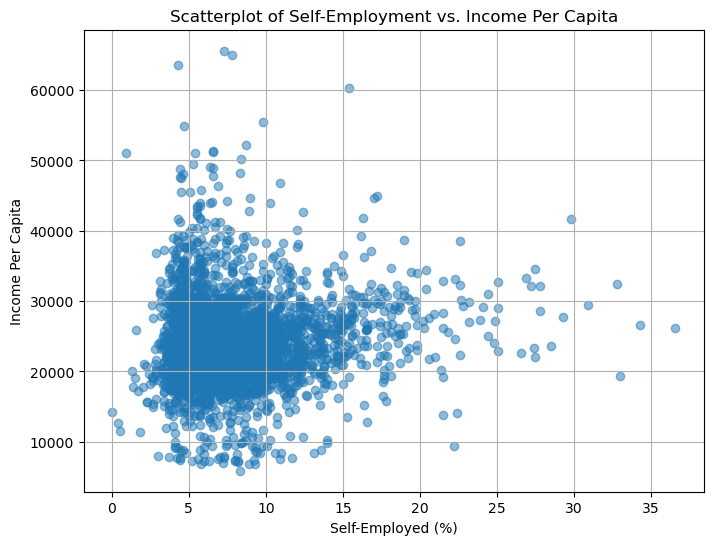

In [22]:
### your code and or answer here ###
### start with a scatterplot and make sure it's properly labeled
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['SelfEmployed'], df['IncomePerCap'], alpha=0.5)  # alpha for transparency
plt.xlabel('Self-Employed (%)')
plt.ylabel('Income Per Capita')
plt.title('Scatterplot of Self-Employment vs. Income Per Capita')
plt.grid(True)  # Add a grid for better readability
plt.show()


In [23]:
import matplotlib.pyplot as plt
from scipy import stats

# ... (your scatterplot code from before) ...

# Calculate Pearson correlation
correlation_pearson, p_value_pearson = stats.pearsonr(df['SelfEmployed'], df['IncomePerCap'])

print(f"Pearson correlation: {correlation_pearson}")
print(f"P-value: {p_value_pearson}")

# Calculate Spearman correlation
correlation_spearman, p_value_spearman = stats.spearmanr(df['SelfEmployed'], df['IncomePerCap'])

print(f"Spearman correlation: {correlation_spearman}")
print(f"P-value: {p_value_spearman}")

Pearson correlation: 0.08727386609551728
P-value: 7.052861196525905e-07
Spearman correlation: 0.056413673053189874
P-value: 0.0013623847564714511


**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

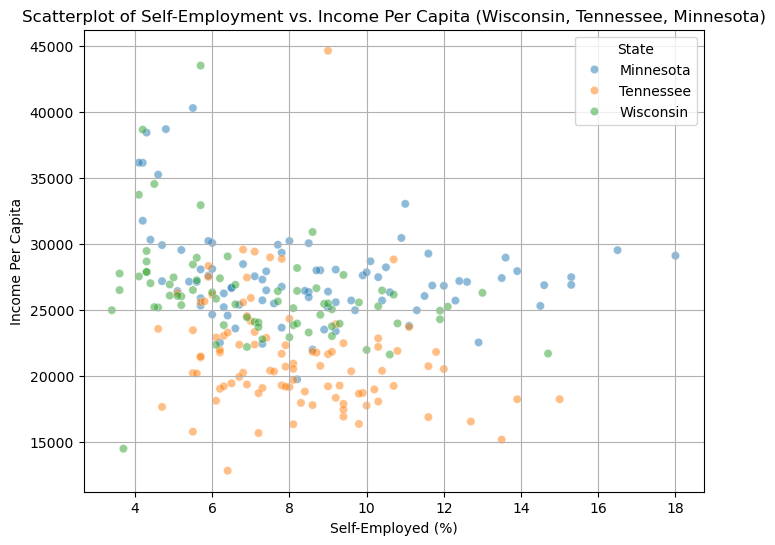


Correlations for Wisconsin:
Pearson correlation: -0.32905300016378525, P-value: 0.004768134887745218
Spearman correlation: -0.46351291044049403, P-value: 4.124859155566003e-05

Correlations for Tennessee:
Pearson correlation: -0.23836048684913141, P-value: 0.020011631955528155
Spearman correlation: -0.316991392780988, P-value: 0.0017487582457931406

Correlations for Minnesota:
Pearson correlation: -0.2538551921654062, P-value: 0.01766519930091194
Spearman correlation: -0.21107460598245847, P-value: 0.04970805582462063


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

states = ['Wisconsin', 'Tennessee', 'Minnesota']
filtered_df = df[df['State'].isin(states)]

# Create scatterplot with hue for State
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SelfEmployed', y='IncomePerCap', hue='State', data=filtered_df, alpha=0.5)
plt.xlabel('Self-Employed (%)')
plt.ylabel('Income Per Capita')
plt.title('Scatterplot of Self-Employment vs. Income Per Capita (Wisconsin, Tennessee, Minnesota)')
plt.grid(True)
plt.show()

# Calculate and print correlations for each state separately
for state in states:
    state_df = df[df['State'] == state]
    correlation_pearson, p_value_pearson = stats.pearsonr(state_df['SelfEmployed'], state_df['IncomePerCap'])
    correlation_spearman, p_value_spearman = stats.spearmanr(state_df['SelfEmployed'], state_df['IncomePerCap'])

    print(f"\nCorrelations for {state}:")
    print(f"Pearson correlation: {correlation_pearson}, P-value: {p_value_pearson}")
    print(f"Spearman correlation: {correlation_spearman}, P-value: {p_value_spearman}")

# You can still calculate and plot regression lines for each state separately if needed
# using the same approach as before, but applied to the filtered_df
# and grouping by 'State' in the statsmodels formula.

In [25]:
import matplotlib.pyplot as plt
from scipy import stats

# ... (your scatterplot code from before) ...

# Calculate Pearson correlation for filtered data
correlation_pearson, p_value_pearson = stats.pearsonr(filtered_df['SelfEmployed'], filtered_df['IncomePerCap'])

print(f"Pearson correlation (filtered): {correlation_pearson}")
print(f"P-value (filtered): {p_value_pearson}")

# Calculate Spearman correlation for filtered data
correlation_spearman, p_value_spearman = stats.spearmanr(filtered_df['SelfEmployed'], filtered_df['IncomePerCap'])

print(f"Spearman correlation (filtered): {correlation_spearman}")
print(f"P-value (filtered): {p_value_spearman}")

Pearson correlation (filtered): -0.20229350736521498
P-value (filtered): 0.0011881639322138644
Spearman correlation (filtered): -0.2366979000103385
P-value (filtered): 0.00014010090313655097


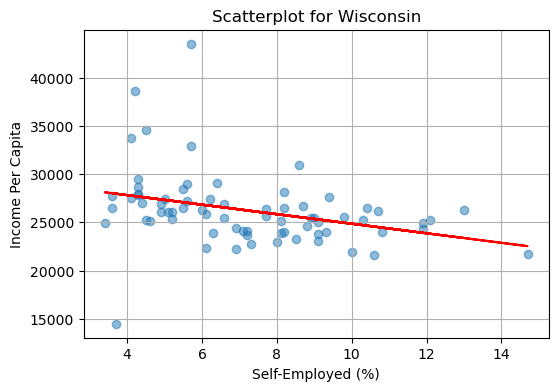

Pearson correlation for Wisconsin: -0.32905300016378525
P-value for Wisconsin: 0.004768134887745218
Spearman correlation for Wisconsin: -0.46351291044049403
P-value for Wisconsin: 4.124859155566003e-05


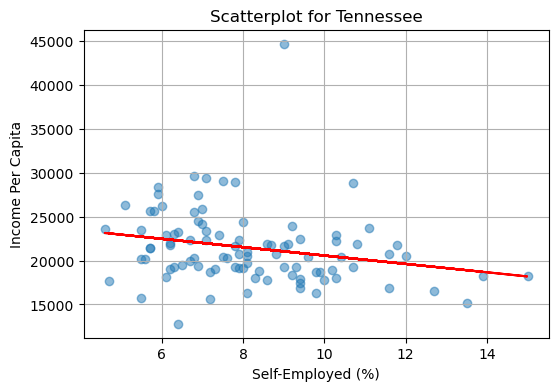

Pearson correlation for Tennessee: -0.23836048684913141
P-value for Tennessee: 0.020011631955528155
Spearman correlation for Tennessee: -0.316991392780988
P-value for Tennessee: 0.0017487582457931406


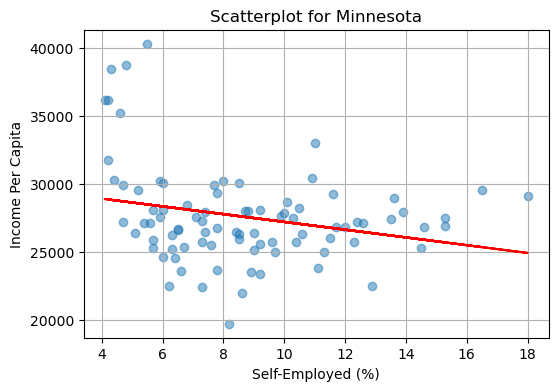

Pearson correlation for Minnesota: -0.2538551921654062
P-value for Minnesota: 0.01766519930091194
Spearman correlation for Minnesota: -0.21107460598245847
P-value for Minnesota: 0.04970805582462063


In [26]:
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

states = ['Wisconsin', 'Tennessee', 'Minnesota']

for state in states:
    state_df = df[df['State'] == state]

    # Create scatterplot for the current state
    plt.figure(figsize=(6, 4))
    plt.scatter(state_df['SelfEmployed'], state_df['IncomePerCap'], alpha=0.5)

    # Calculate and plot regression line using statsmodels
    model = smf.ols('IncomePerCap ~ SelfEmployed', data=state_df).fit()
    plt.plot(state_df['SelfEmployed'], model.predict(state_df), color='red')

    plt.xlabel('Self-Employed (%)')
    plt.ylabel('Income Per Capita')
    plt.title(f'Scatterplot for {state}')
    plt.grid(True)
    plt.show()

    # Calculate Pearson correlation
    correlation_pearson, p_value_pearson = stats.pearsonr(state_df['SelfEmployed'], state_df['IncomePerCap'])
    print(f"Pearson correlation for {state}: {correlation_pearson}")
    print(f"P-value for {state}: {p_value_pearson}")

    # Calculate Spearman correlation
    correlation_spearman, p_value_spearman = stats.spearmanr(state_df['SelfEmployed'], state_df['IncomePerCap'])
    print(f"Spearman correlation for {state}: {correlation_spearman}")
    print(f"P-value for {state}: {p_value_spearman}")

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest? Wisconsin, as it has the strongest negative correlation among all

In [ ]:
### your code and or answer here ###
### use hue as "extra" variable in the scatterplot.

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

In Set B, since the correlations are all positive, meaning that Higher Self Employment is usually acompnanied by Higher Income Per Capita

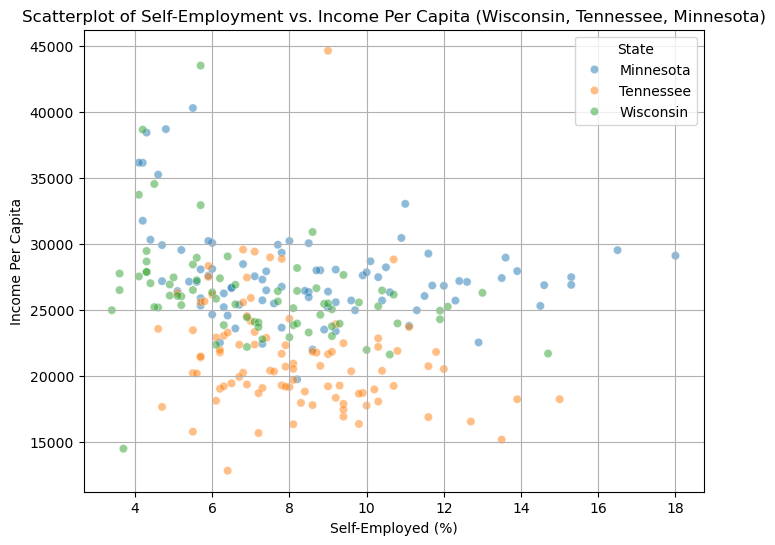


Correlations for Wisconsin:
Pearson correlation: -0.32905300016378525, P-value: 0.004768134887745218
Spearman correlation: -0.46351291044049403, P-value: 4.124859155566003e-05

Correlations for Tennessee:
Pearson correlation: -0.23836048684913141, P-value: 0.020011631955528155
Spearman correlation: -0.316991392780988, P-value: 0.0017487582457931406

Correlations for Minnesota:
Pearson correlation: -0.2538551921654062, P-value: 0.01766519930091194
Spearman correlation: -0.21107460598245847, P-value: 0.04970805582462063


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

states = ['Wisconsin', 'Tennessee', 'Minnesota']
filtered_df = df[df['State'].isin(states)]

# Create scatterplot with hue for State
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SelfEmployed', y='IncomePerCap', hue='State', data=filtered_df, alpha=0.5)
plt.xlabel('Self-Employed (%)')
plt.ylabel('Income Per Capita')
plt.title('Scatterplot of Self-Employment vs. Income Per Capita (Wisconsin, Tennessee, Minnesota)')
plt.grid(True)
plt.show()

# Calculate and print correlations for each state separately
for state in states:
    state_df = df[df['State'] == state]
    correlation_pearson, p_value_pearson = stats.pearsonr(state_df['SelfEmployed'], state_df['IncomePerCap'])
    correlation_spearman, p_value_spearman = stats.spearmanr(state_df['SelfEmployed'], state_df['IncomePerCap'])

    print(f"\nCorrelations for {state}:")
    print(f"Pearson correlation: {correlation_pearson}, P-value: {p_value_pearson}")
    print(f"Spearman correlation: {correlation_spearman}, P-value: {p_value_spearman}")

# You can still calculate and plot regression lines for each state separately if needed
# using the same approach as before, but applied to the filtered_df
# and grouping by 'State' in the statsmodels formula.

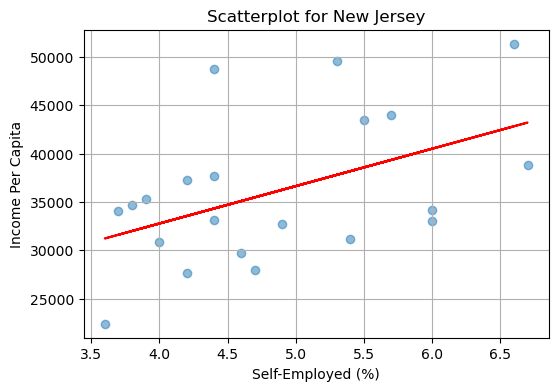

Pearson correlation for New Jersey: 0.48044784713362826
P-value for New Jersey: 0.027488944757806208
Spearman correlation for New Jersey: 0.40403460177366013
P-value for New Jersey: 0.06929493068926951


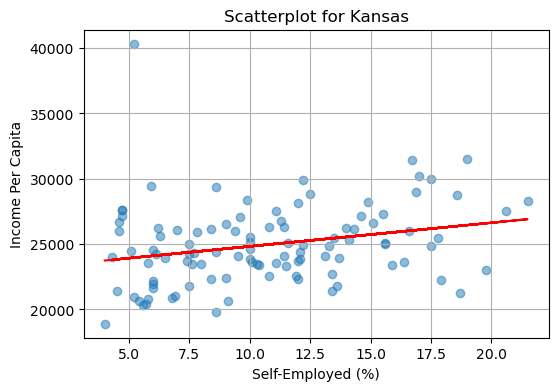

Pearson correlation for Kansas: 0.25810299714436913
P-value for Kansas: 0.007853351846832423
Spearman correlation for Kansas: 0.28392575483491556
P-value for Kansas: 0.0033332825399419903


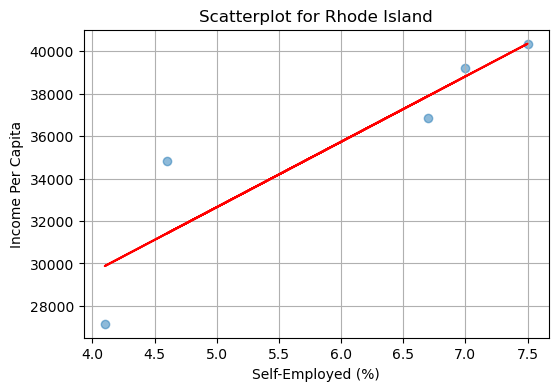

Pearson correlation for Rhode Island: 0.9021788382149803
P-value for Rhode Island: 0.03618310201575928
Spearman correlation for Rhode Island: 0.9999999999999999
P-value for Rhode Island: 1.4042654220543672e-24


In [28]:
### your code and or answer here ###
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

states = ['New Jersey', 'Kansas', 'Rhode Island']

for state in states:
    state_df = df[df['State'] == state]

    # Create scatterplot for the current state
    plt.figure(figsize=(6, 4))
    plt.scatter(state_df['SelfEmployed'], state_df['IncomePerCap'], alpha=0.5)

    # Calculate and plot regression line using statsmodels
    model = smf.ols('IncomePerCap ~ SelfEmployed', data=state_df).fit()
    plt.plot(state_df['SelfEmployed'], model.predict(state_df), color='red')

    plt.xlabel('Self-Employed (%)')
    plt.ylabel('Income Per Capita')
    plt.title(f'Scatterplot for {state}')
    plt.grid(True)
    plt.show()

    # Calculate Pearson correlation
    correlation_pearson, p_value_pearson = stats.pearsonr(state_df['SelfEmployed'], state_df['IncomePerCap'])
    print(f"Pearson correlation for {state}: {correlation_pearson}")
    print(f"P-value for {state}: {p_value_pearson}")

    # Calculate Spearman correlation
    correlation_spearman, p_value_spearman = stats.spearmanr(state_df['SelfEmployed'], state_df['IncomePerCap'])
    print(f"Spearman correlation for {state}: {correlation_spearman}")
    print(f"P-value for {state}: {p_value_spearman}")

# Part 2: Becoming a DataVizard exercise

This part is about data visualization! You will use common python libraries, Matplotlib and Seaborn to create effective and clear visualizations. You will work with a dataset containing information about the top ten grossing movies in each year.

These are the visualizations we will make, and that you will use to solve the exercise:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook. We will make simple visualizations, but you will notice that all of the visualizations consider many optional parameters. You are encouraged to explore them, and modify them to make the most efficient visualizations and match your desired style. As we discussed in class, the default visualizations are not necessarily the most efficient, so make sure to play around and find the optimal ones.

Beyond Matplotlib and Seaborn, there are many more resources that might be useful for you, for example:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) and [Folium](https://python-visualization.github.io/folium/)

Create your custom signature colorpalettes:
- [coolors](https://coolors.co/)

In [41]:
# Let's load necessary libraries and the datasets
# "pip install seaborn" if necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './data/'


movies = pd.read_csv(data_folder+'blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [45]:
movies.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018


In [47]:
movies.describe()

,imdb_rating,length,rank_in_year,worldwide_gross,year
count,437.000000,437.000000,437.000000,4.370000e+02,437.000000
mean,7.076659,119.871854,5.524027,3.902409e+08,1996.647597
std,0.820273,22.744332,2.869884,3.158344e+08,12.630396
min,4.400000,27.000000,1.000000,3.467310e+07,1975.000000
25%,6.500000,103.000000,3.000000,1.239224e+08,1986.000000
50%,7.100000,118.000000,6.000000,3.342011e+08,1997.000000
75%,7.700000,134.000000,8.000000,5.537098e+08,2008.000000
max,9.000000,201.000000,10.000000,2.749064e+09,2018.000000


In [48]:
highest_grossing_movie = movies.loc[movies['worldwide_gross'].idxmax()]

print(highest_grossing_movie)

Main_Genre                  Fantasy
Genre_2                   Adventure
Genre_3                      Action
imdb_rating                     7.9
length                          162
rank_in_year                      1
rating                        PG-13
studio             20th Century Fox
title                        Avatar
worldwide_gross        2749064328.0
year                           2009
Name: 90, dtype: object


## B2.1 Tutorial: Using data visualization libraries

We will use the blockbusters dataset. Summary of the features:
- *Main_Genre*: the primary genre of the movie
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: movie length in minutes
- *rank_in_year*: rank among the top 10 movies released that year
- *rating*: audience rating
- *studio*: the studio that produced the movie
- *title*: movie title
- *worldwide_gross*: total worldwide revenue in dollars
- *year*: year of release


## Visualizing a single variable

- First we will see how to visualize a single variable using matplotlib library. Let's focus on "Worldwide gross revenue" column of the dataframe and inspect the distribution, using histogram and boxplot.
- Notice the use of  plt.xlabel(), plt.ylabel(), plt.title() - every visualization should have axis labeled, and a title!
- plt.hist() takes a couple of important arguments: bins - the number of bins, and range - the range of values considered in the histogram.

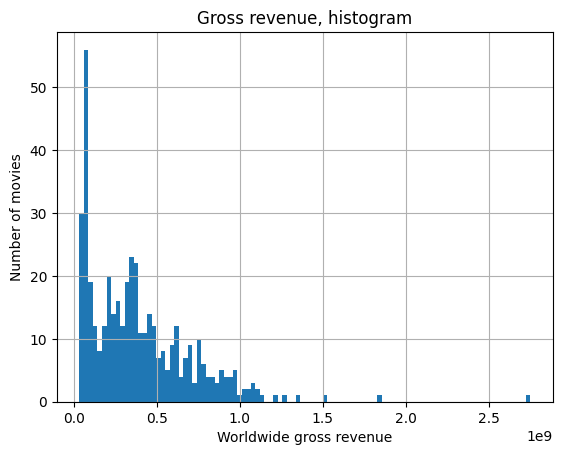

In [42]:
#we use pandas wrapper
movies['worldwide_gross'].hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');

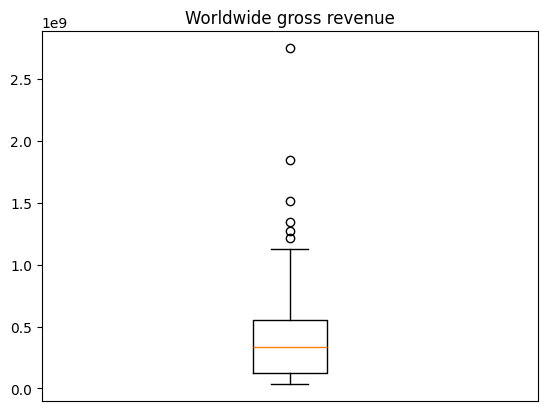

In [43]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

## Visualizing two continuous variables

- Let's see if blockbusters with higher ratings also make more revenue!
- There are many ways how a relationship between two variables can be examined. The simplest one is a scatterplot, using plt.scatterplot().

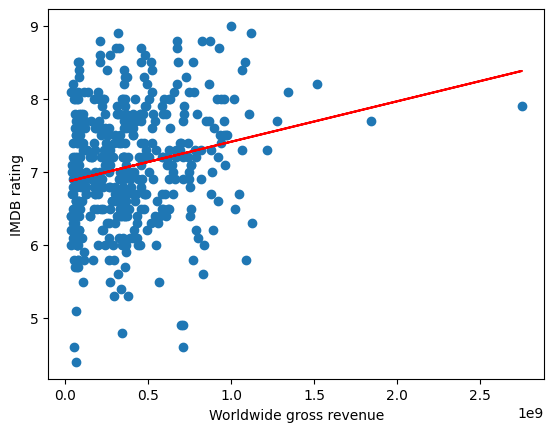

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatterplot
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])
plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

# Calculate and plot the best-fit line
slope, intercept = np.polyfit(movies['worldwide_gross'], movies['imdb_rating'], 1)
plt.plot(movies['worldwide_gross'], slope * movies['worldwide_gross'] + intercept, color='red')

plt.show()

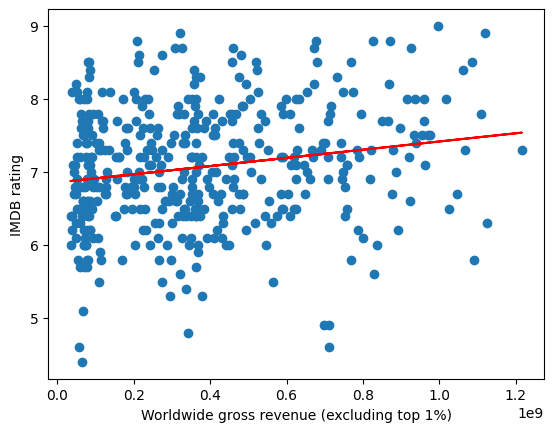

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the 99th percentile of worldwide_gross
percentile_99 = movies['worldwide_gross'].quantile(0.99)

# Filter out the top 1%
filtered_movies = movies[movies['worldwide_gross'] <= percentile_99]

# Create the scatterplot
plt.scatter(filtered_movies['worldwide_gross'], filtered_movies['imdb_rating'])
plt.xlabel('Worldwide gross revenue (excluding top 1%)')
plt.ylabel('IMDB rating')

# Calculate and plot the best-fit line for the filtered data
slope, intercept = np.polyfit(filtered_movies['worldwide_gross'], filtered_movies['imdb_rating'], 1)
plt.plot(filtered_movies['worldwide_gross'], slope * filtered_movies['worldwide_gross'] + intercept, color='red')

plt.show()

In [53]:
from scipy import stats

# Calculate Pearson correlation
correlation_pearson, p_value_pearson = stats.pearsonr(filtered_movies['worldwide_gross'], filtered_movies['imdb_rating'])
print(f"Pearson correlation (excluding top 1%): {correlation_pearson}")
print(f"P-value: {p_value_pearson}")

# Calculate Spearman correlation
correlation_spearman, p_value_spearman = stats.spearmanr(filtered_movies['worldwide_gross'], filtered_movies['imdb_rating'])
print(f"Spearman correlation (excluding top 1%): {correlation_spearman}")
print(f"P-value: {p_value_spearman}")

Pearson correlation (excluding top 1%): 0.18876734825190306
P-value: 7.892732503928273e-05
Spearman correlation (excluding top 1%): 0.1880376545689767
P-value: 8.420856801595626e-05


In [50]:
movies.shape

(437, 11)

In [49]:
# Calculate Pearson correlation
correlation_pearson, p_value_pearson = stats.pearsonr(movies['worldwide_gross'], movies['imdb_rating'])
print(f"Pearson correlation: {correlation_pearson}")
print(f"P-value: {p_value_pearson}")

# Calculate Spearman correlation
correlation_spearman, p_value_spearman = stats.spearmanr(movies['worldwide_gross'], movies['imdb_rating'])
print(f"Spearman correlation: {correlation_spearman}")

Pearson correlation: 0.21325728109060607
P-value: 6.888218249305953e-06
Spearman correlation: 0.20642409880107196


- Visually examining the plot, how do you interpret the relationship between revenue and IMDB rating?
- Markers indicatig the datapoints seem too large, and we cannot get a sense of the distribution in the area of the plot where the markers are overlapping.
- We'll try to make the markers smaller by specifying a small "s" size parameter.

Text(0, 0.5, 'IMDB rating')

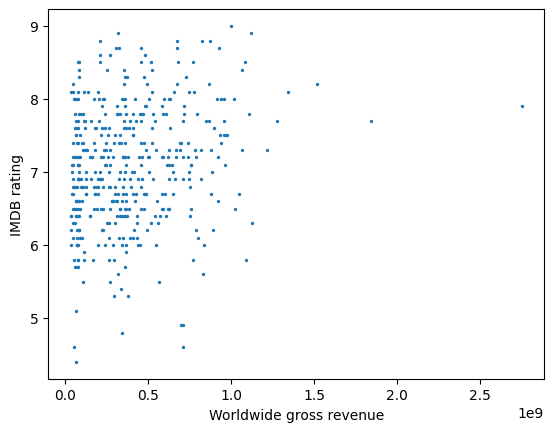

In [54]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Do you notice anything strange? What could be the reason?

Scatterplots are not useful when the number of datapoints is very large, as it becomes hard to interpret it. Seaborn library offers many alternative effective ways of visualizing join distributions.

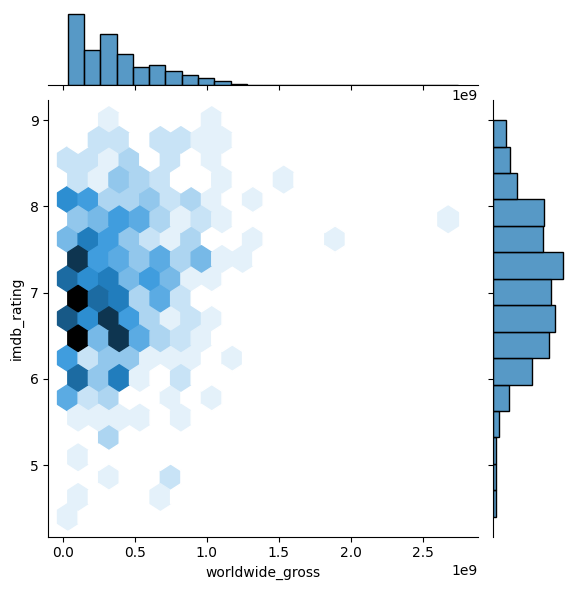

In [55]:
sns.jointplot(x=movies['worldwide_gross'], y=movies['imdb_rating'], kind="hex")

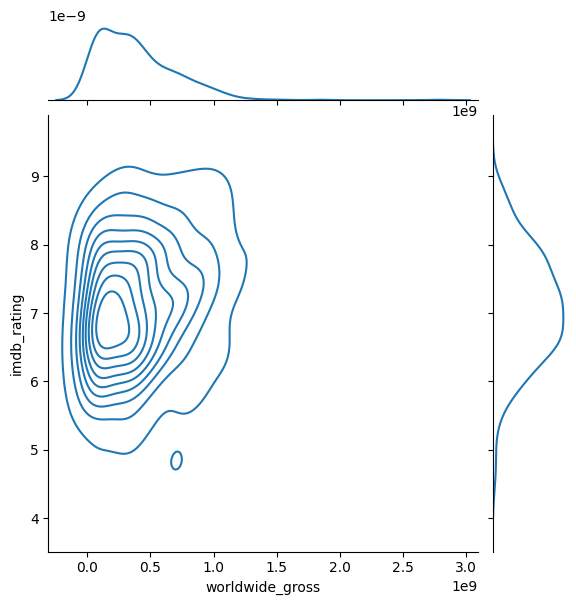

In [56]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="kde")


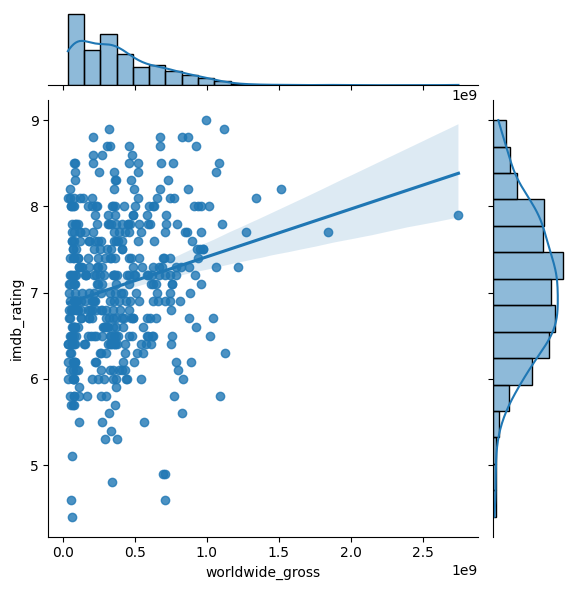

In [57]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg")

## Visualizing two variables, continuous and categorical

- Let's consider the five most prevalent genres, and examine the revenue.
- We'll show barplot (we get errorbars by default, how neat!), boxplot, and violinplot. Seaborn offers many more compelling visualizations. We will stop here, but see the gallery for more examples: https://seaborn.pydata.org/examples/index.html

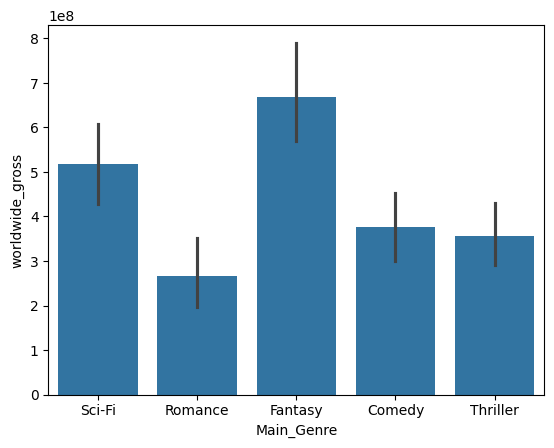

In [58]:
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

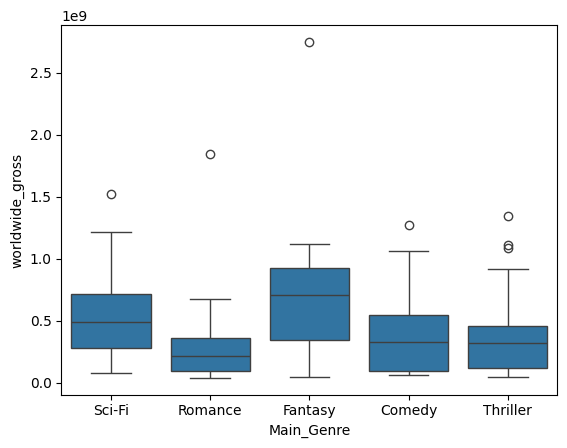

In [59]:
ax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

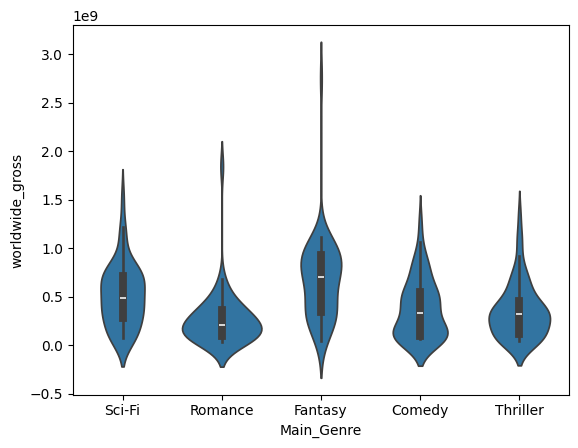

In [60]:
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

## B2.2 Exercises: Making more advanced visualizations


To make a good data visualization, we first need a clear idea of what we want to visualize! Do we aggregate the data, and how? What quantity should be on the different axis? How to use colors and item sizes? It often helps to sketch the visualization by hand before coding it up. By doing that, we can also give ourselves a moment to speculate what the visualization could look like under different hypotheses.

In the next three excercises, you are provided with descriptions and rough sketches of visualizations that are possibly useful to understand the movies dataset.


### 1. Visualizing uncertainty

- How did the average revenue of blockbusters evolve? Visualize the average yearly worldwide gross revenue, together with the standard deviation. Below, you are provided with two rough sketches of how the visualization could look like. We could indicate the margin of error with lines with caps, or by contouring between the upper and lower bound.

- Hints: use Matplotlib errorbar and fill_between functions.

- Did the average revenue increase/decrease over time? What do you observe?


<img src="figure0.jpg" style="width: 400px;" align="left" />
<img src="figure1.jpg" style="width: 400px;" align="left"/>


<br>


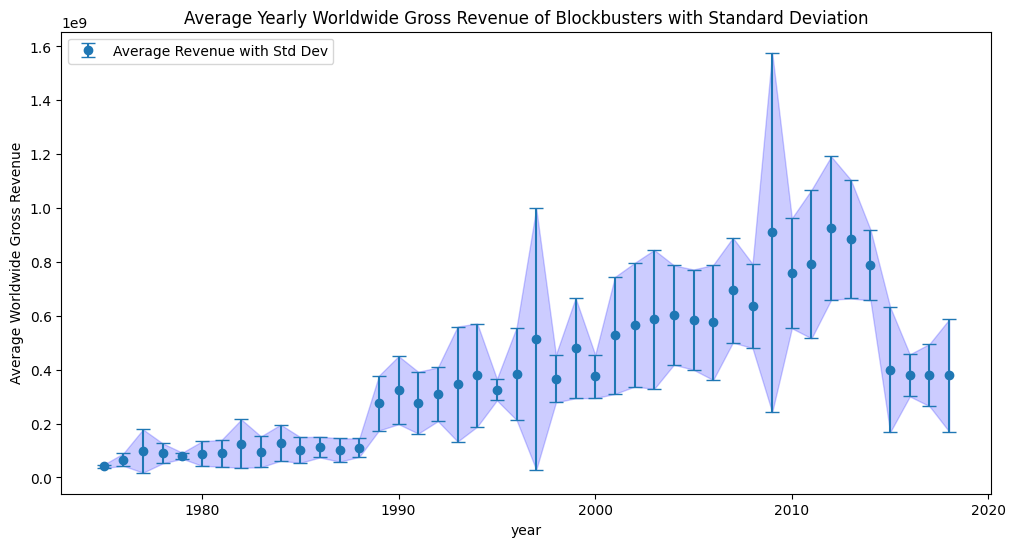

In [61]:
# Calculate yearly stats across movies here
# groupby and apply might be useful here.
yearly_stats = movies.groupby('year')['worldwide_gross'].agg(['mean', 'std']).reset_index()
# data for plotting
years = yearly_stats['year']
mean_revenue = yearly_stats['mean']
std_revenue = yearly_stats['std']

# Create the plot
plt.figure(figsize=(12, 6))

plt.errorbar(years, mean_revenue, yerr=std_revenue, fmt='o', capsize=5, label='Average Revenue with Std Dev')
plt.fill_between(years, mean_revenue - std_revenue, mean_revenue + std_revenue, color='b', alpha=0.2)

# Add labels and title
plt.xlabel('year')
plt.ylabel('Average Worldwide Gross Revenue')
plt.title('Average Yearly Worldwide Gross Revenue of Blockbusters with Standard Deviation')
plt.legend()

plt.show()



In [ ]:
# Write your code to make plot with errorbars here
# use plt.errorbar

In [ ]:
# Write your code to make filled plot here

In [ ]:
# Write your interpretation here

### 2. Creating panels

- Next, we want to understand how long the blockbusters are in the different genres. When working with a large number of categories (we have 16 genres in the movies dataset), the visualizations easily become cluttered, and it becomes useful to make panels with small subplots.

- Make a 4x4 panel for the 16 genres. In each subplot, show a histogram with the distribution of movie lengths for different categories. Below, find a sketch of how this visualization could look like. Note the same x- and y-scale that allows comparison between categories!

- Hints: use Matplotlib subplots function to initialize the subplotting axes.

- What genres do the longest movies belong too? What can you say about the length of Comedy and animation movies?

- How could we assign different color to each subplot (each genre)? What type of palette would be the best choice? Make a variation of the visualzation where each genre is visualized in a different color.

<img src="figure3.jpg" style="width: 500px;" align="left">

In [ ]:
# Calculate stats by genre here

In [ ]:
# Write your code to make 4x4 panel here

In [ ]:
# Write your interpretation here

### 3. Heatmaps

- What studios make blockbusters in which genre?

- There are many studios and many genres. When working with two variables that both have many different categories, there is often no space for representing each combination of two categories with a detailed plot (such as barplot of boxplot). It becomes useful to represent each stratum with one number, indicated with color in a heatmap. Such visualizations are useful to quickly understand the data.

- Visualize the number of blockbusters made by each studio, of each genre. You will find below a rough sketch. Hint: use Seaborn heatmap function.

- Finally, with a heatmap we can represent three variables, by coding a third variable with color. Try to understand what is the relationship between genres by understanding the co-occurence patterns between the main and secondary genre. What is the average worldwide gross revenue for movies with different combinations of main and second genre?

- You should be able to easily answer the following questions from the two visualizations: What genres do the majority of movies made by Warner Bros studio fall into? What is the most successful genre of Walt Disney pictures movies? What studio made the largest number of Romance blockbusters? Which combination of genres brings the highest revenue?



<img src="figure4.jpg" style="width: 500px;" align="left">

In [ ]:
# Write your code to make the first heatmap here
# crosstab might be useful here

In [ ]:
# Write your code to make the second heatmap here

In [ ]:
# Write your interpretations here

### 4. Be a show-off

Finally, we did not explore the impact of the rank of the movie among the top ten. How is the rank among the top ten related to the genres? What kind of visualization can be suitable to understand this better? To practice your data viz skills, sketch a potential visualization on a piece of paper, and then implement it using the appropriate type of visualization.

In [ ]:
# Write your dataviz show-off code here